In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import matplotlib.pyplot as plt

CNN model dengan dataset Rock-Paper-Scissors

In [15]:
train_dir = "/content/drive/MyDrive/rps-cv-images"

In [17]:
batch_size = 32
epochs = 10

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2188 images belonging to 3 classes.


In [20]:
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))  # Input layer
model.add(Dense(128, activation='relu'))  # Hidden layer dengan 128 neuron dan fungsi aktivasi ReLU
model.add(Dense(3, activation='softmax'))  # Output layer dengan 3 neuron (karena 3 kelas) dan fungsi aktivasi softmax


In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator) // batch_size,
    epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 3s 792ms/step - loss: 28.3697 - accuracy: 0.2500
Epoch 2/10
2/2 [==============================] - 1s 467ms/step - loss: 33.7428 - accuracy: 0.3281
Epoch 3/10
2/2 [==============================] - 1s 462ms/step - loss: 11.8060 - accuracy: 0.2812
Epoch 4/10
2/2 [==============================] - 1s 489ms/step - loss: 5.3093 - accuracy: 0.4375
Epoch 5/10
2/2 [==============================] - 1s 474ms/step - loss: 7.5823 - accuracy: 0.3281
Epoch 6/10
2/2 [==============================] - 1s 486ms/step - loss: 4.3332 - accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 1s 527ms/step - loss: 7.6216 - accuracy: 0.2656
Epoch 8/10
2/2 [==============================] - 1s 491ms/step - loss: 5.2874 - accuracy: 0.3125
Epoch 9/10
2/2 [==============================] - 1s 525ms/step - loss: 6.0800 - accuracy: 0.3750
Epoch 10/10
2/2 [==============================] - 2s 783ms/step - loss: 2.3545 - accuracy: 0.5000


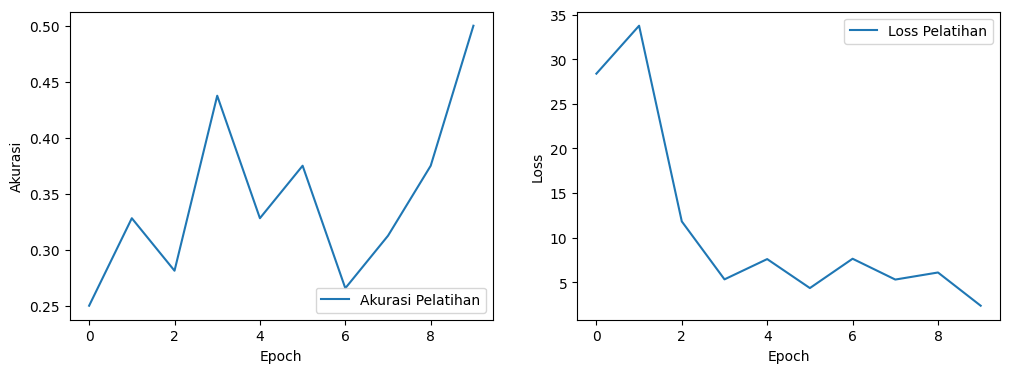

In [23]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Akurasi Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()